#Exercse2 report

### lesson
* Lesson 1 - What's your pet

### student
* 20161622 이예은


# Ready to Notebook

Every notebook starts with the following this code. After that, import necessary packages

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Starting % mean Jupiter Notebook code
# Any edits to libraries you make are reloaded here automatically and any charts or images displayed are shown in this notebook.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

#fast ai library "docs.fast.ai"


Set batch size for my GPU. If the GPU is samll, uncomment 2'nd line

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# modify batch size for GPU




## Handling data

Using the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds tests our model. It needs to learn to differentiate between these 37 distinct categories. 



We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [9]:
help(untar_data)
#show the argument of untar_data function


Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [10]:
path = untar_data(URLs.PETS); path

# pass a URL as an argument and set path of untared data by URL

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [11]:
path.ls()

# Show a directory-listing of data path

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'
# <path objects>+'/'+<folder> 
# Assign specific path to each variable(path_anno, path_img)


**Label**
* group of samples
* set part of the file name
* need labels for model
* ex) in this case (path + label+ '_' + number

In [13]:
fnames = get_image_files(path_img)
fnames[:5]

# get image files list and show the slicing list


[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_99.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_74.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_141.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_148.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

# set seed 2 for form_name_re
# using a regular expression to extract the label

**ImageDataBunch** 
  *  databunch has to 2 or 3 data sets it contain traing datas

**ImageDataBunch.from_name_re** 
  * create training set and labeling, and image transformming
  * argument
    * path_img : path containing images
    * lnames : list of file names
    * pat : regular expression pattern
    * ds_tfms : get_transform does cropping, resizing and pending
    * size : image size ( Images need same size for gpu. Bc gpu has to apply the exact same)

**normalize**
  * change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information
  * normalize data
  * Data not normailized have trouble training a model one thing to check is that you've normalized it.



In [15]:
doc(ImageDataBunch.from_name_re)
# Show documentation ImageDataBunch.from_name_re()

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

# Create a training set with data labeling and trasforming
# After that, normalize that data set and save the data variable 

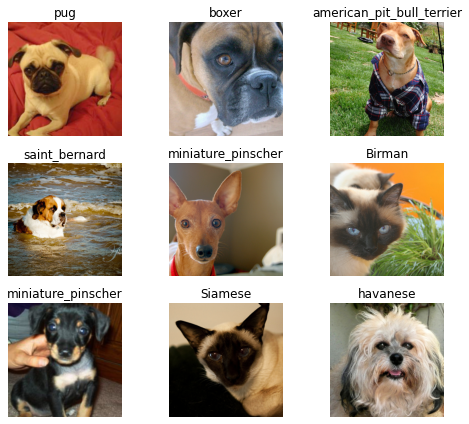

In [17]:
data.show_batch(rows=3, figsize=(7,6))


# show a batch of data 

In [18]:
print(data.classes)
len(data.classes),data.c

# Accord your classes, that's where the data bunch. print out data classes
# show possible categories

# len() : lenght of classes list 
# data.c : number of classes

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training - resnet34


**Learner**
* trained model in fast.ai

**cnn_learner**
: learner for convolusion neural network

**resnet34**
* include model, data bunch
* the resnet34 model have 34 hidden layers
* already trained model

**matrics** :  things that get printed out as it's training, in this case, print out the error rate

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

#Using already trained model resnet34, create a learner for nueral network


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [21]:
learn.fit_one_cycle(4)

# fit_one_cycle(n): start learning by n 
# n decides how many times do we go through the entire data set? 



epoch,train_loss,valid_loss,error_rate,time
0,1.386778,0.325586,0.108254,01:33
1,0.594603,0.295765,0.096752,01:33
2,0.373581,0.241050,0.078484,01:31
3,0.288687,0.215200,0.066982,01:31


In [0]:
learn.save('stage-1')
#save parameter of model


## Results

Analyze the results to find where the confusion is. It is big help to better performace.

**interpretation**
* show interpreted result
**lossess**
* Higher confidence but wrong datas have biger losses

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
# for see what comes out

losses,idxs = interp.top_losses()
# retrun biggest losses and index

len(data.valid_ds)==len(losses)==len(idxs)

True

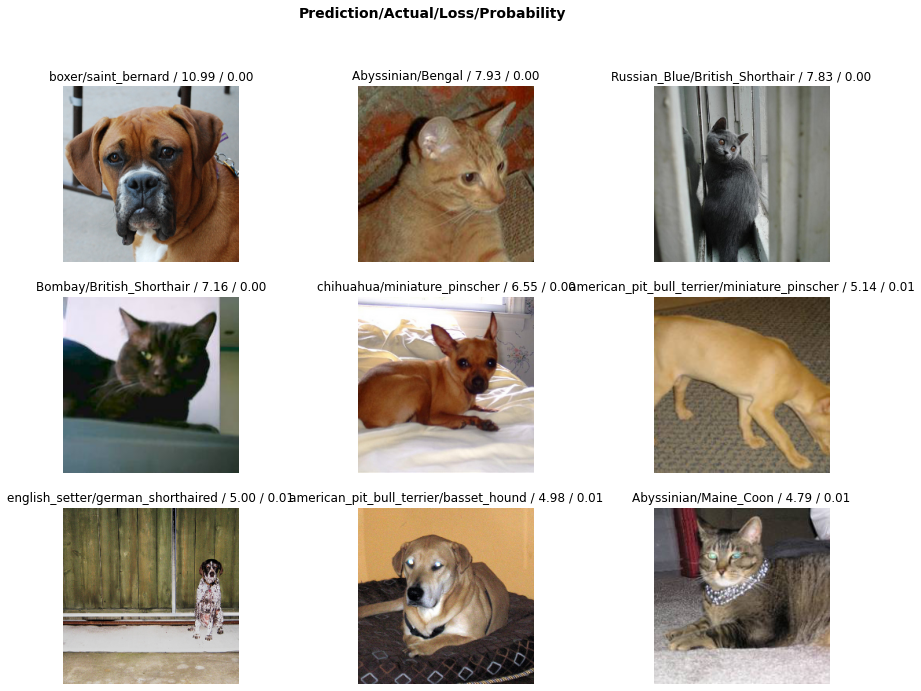

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

# print the biggest 9 losses 

In [25]:
doc(interp.plot_top_losses)

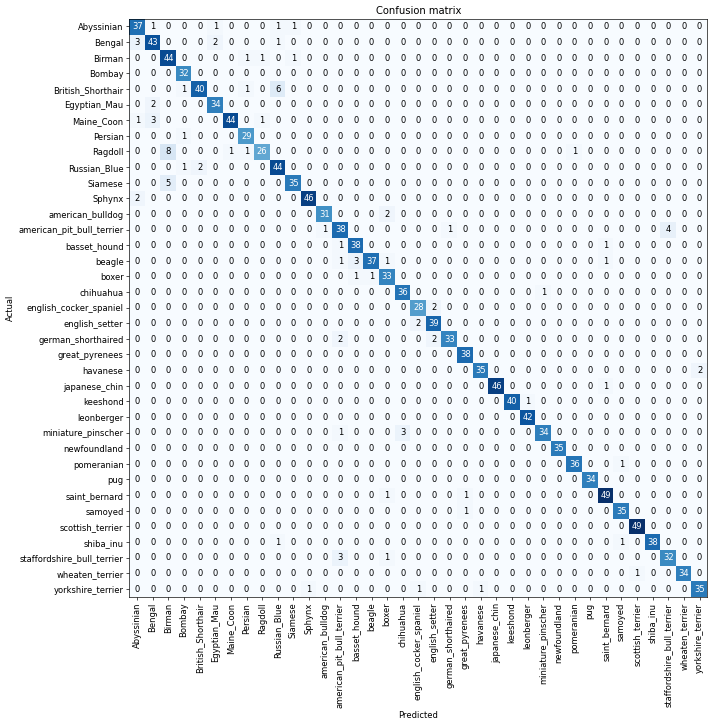

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Interpreted to confusion matrix with actual data and confusion data
# The higher the diagonal number of matrix, it have better performace.

In [27]:
interp.most_confused(min_val=2)

# simply grab out the confusion matrix the particular

[('Ragdoll', 'Birman', 8),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Siamese', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Maine_Coon', 'Bengal', 3),
 ('beagle', 'basset_hound', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Sphynx', 'Abyssinian', 2),
 ('american_bulldog', 'boxer', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('havanese', 'yorkshire_terrier', 2)]

## Unfreezing, fine-tuning, and learning rates

**Unfreezing** :
train whole models

In [0]:
learn.unfreeze() #it train whole model

In [29]:
learn.fit_one_cycle(1)
# training one cycle


epoch,train_loss,valid_loss,error_rate,time
0,0.671630,0.363989,0.106901,01:35


In [0]:
learn.load('stage-1');
# reset parameter of model to stage-1

In [31]:
learn.lr_find()

# learn rate : how quickly an i updating the parameters in my model

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


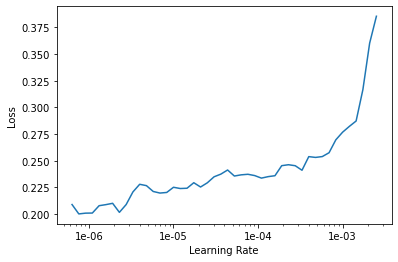

In [32]:
learn.recorder.plot()
#print learning rate graph

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
# Set the learning rate interval with little loss.

epoch,train_loss,valid_loss,error_rate,time
0,0.249756,0.214484,0.066306,01:33
1,0.225133,0.208234,0.062246,01:33


That's a pretty accurate model!

## Training: resnet50

**resnet50**
* the resnet50 model have 34 hidden layers
* already trained mode

> The deeper the depth of CNN, the more detailed classification becomes possible.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)
# Create a training set with data labeling and trasforming

In [35]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
#learning for cnn

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


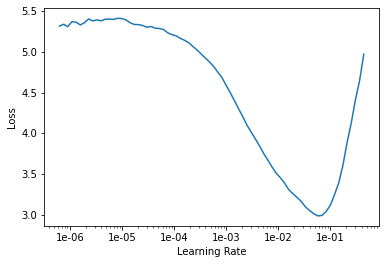

In [36]:
learn.lr_find()
# find learning rate
learn.recorder.plot()
#print learning rate plot

In [37]:
learn.fit_one_cycle(8)
# train in 8 cycles

epoch,train_loss,valid_loss,error_rate,time
0,0.688344,0.297849,0.099459,02:23
1,0.484192,0.345825,0.103518,02:20
2,0.406424,0.274311,0.076455,02:20
3,0.326979,0.221913,0.068336,02:19
4,0.267838,0.203818,0.057510,02:20
5,0.179006,0.177911,0.052097,02:20
6,0.151899,0.161016,0.044655,02:20
7,0.123716,0.159098,0.048038,02:20


In [0]:
learn.save('stage-1-50')
# save the parameter of model

In [39]:
learn.unfreeze()
# train whole things
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))
# set learning rate interval by recorder.plot

epoch,train_loss,valid_loss,error_rate,time
0,0.125300,0.159948,0.043978,02:34
1,0.100481,0.155204,0.043302,02:31
2,0.089625,0.155201,0.046008,02:29


reload to before model

In [0]:
learn.load('stage-1-50');
#load before model

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
#interprete the learning model

In [42]:
interp.most_confused(min_val=2)
# print most 2 confused data 

[('Bengal', 'Egyptian_Mau', 6),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('British_Shorthair', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'saint_bernard', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

## Other data formats

In [43]:
path = untar_data(URLs.MNIST_SAMPLE); path
# save path of untared data by the URL

PosixPath('/root/.fastai/data/mnist_sample')

In [44]:
(path/'train').ls()
# print list in that path

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

In [0]:
tfms = get_transforms(do_flip=False)
# data transforming without flip
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
# create data Bunch

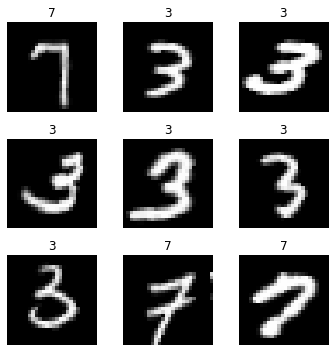

In [46]:
data.show_batch(rows=3, figsize=(5,5))
# show a batch of data

In [47]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

# create and fit learn for cnn 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.195196,0.075656,0.974975,00:19
1,0.123872,0.050265,0.985770,00:18


In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()
#label by path

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

# label from folder and create data bunch
# label ex) 0 or 1 is it a 7 or not?

[0, 1]

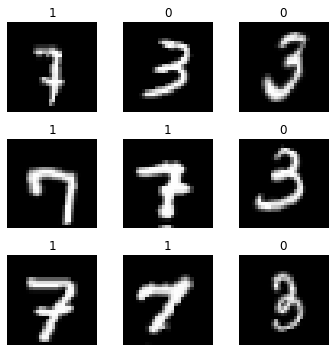

In [50]:
data.show_batch(rows=3, figsize=(5,5))
data.classes
# show a a batch of data
# and print result of classes (0 or 1)

In [51]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

#print data classes(0 or 1)

[0, 1]

In [52]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

# get path of data set with slicing

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [53]:
doc(ImageDataBunch.from_name_re)
#documentation

In [54]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

# label by regular expression

['3', '7']

In [55]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

#print data classes

['3', '7']

In [56]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

#create array of labels have labeled 3 by condition

['3', '3', '3', '3', '3']

In [57]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes
# create an array of labels through my labels is from list

['3', '7']